In [11]:
import tensorflow as tf 
import numpy as np 
import cv2 as cv 
import os

In [12]:
dataset_length = 0
for i in range(26):
    dir = 'data/JNIST/test_split_images/%s' % chr(ord('a') + i)
    dataset_length += len(os.listdir(dir))

numpy_data = np.zeros([dataset_length, 32*32+1], dtype='uint8')

index = 0
for i in range(26):
    dir = 'data/JNIST/test_split_images/%s' % chr(ord('a') + i)
    print(dir)
    for path in os.listdir(dir):
        img_path = '%s/%s' % (dir, path)
        img = cv.imread(img_path, 0)
        numpy_data[index, :] = np.append(img.reshape([1, -1]), i)
        index += 1
np.savetxt('results/data.csv', numpy_data, '%d', ',')

data/JNIST/test_split_images/a
data/JNIST/test_split_images/b
data/JNIST/test_split_images/c
data/JNIST/test_split_images/d
data/JNIST/test_split_images/e
data/JNIST/test_split_images/f
data/JNIST/test_split_images/g
data/JNIST/test_split_images/h
data/JNIST/test_split_images/i
data/JNIST/test_split_images/j
data/JNIST/test_split_images/k
data/JNIST/test_split_images/l
data/JNIST/test_split_images/m
data/JNIST/test_split_images/n
data/JNIST/test_split_images/o
data/JNIST/test_split_images/p
data/JNIST/test_split_images/q
data/JNIST/test_split_images/r
data/JNIST/test_split_images/s
data/JNIST/test_split_images/t
data/JNIST/test_split_images/u
data/JNIST/test_split_images/v
data/JNIST/test_split_images/w
data/JNIST/test_split_images/x
data/JNIST/test_split_images/y
data/JNIST/test_split_images/z


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(numpy_data[:, :-1], numpy_data[:, -1], test_size = 0.2)

In [14]:
X_train = (X_train - np.mean(X_train, axis=1).reshape([-1, 1])) / (0.0001 + np.std(X_train, axis=1).reshape([-1, 1]))
X_test = (X_test - np.mean(X_test, axis=1).reshape([-1, 1])) / (0.0001 + np.std(X_test, axis=1).reshape([-1, 1]))

X_train = X_train.reshape([-1, 32, 32, 1])
X_test = X_test.reshape([-1, 32, 32, 1])

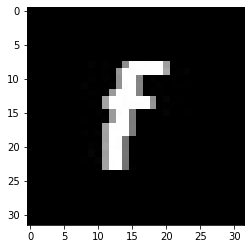

In [15]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :, 0], 'gray')
plt.show()

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)),
    layers.AveragePooling2D(),
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.AveragePooling2D(),
    layers.Flatten(),
    layers.Dense(units=120, activation='relu'),
    layers.Dense(units=84, activation='relu'),
    layers.Dense(units=26, activation = 'softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_2 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_3 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [17]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
# train
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1019/1019 [==============================] - 14s 14ms/step - loss: 2.6232 - accuracy: 0.7019
Epoch 2/10
1019/1019 [==============================] - 12s 12ms/step - loss: 2.5211 - accuracy: 0.7994
Epoch 3/10
1019/1019 [==============================] - 12s 12ms/step - loss: 2.4320 - accuracy: 0.8897
Epoch 4/10
1019/1019 [==============================] - 11s 11ms/step - loss: 2.4086 - accuracy: 0.9129
Epoch 5/10
1019/1019 [==============================] - 11s 11ms/step - loss: 2.4080 - accuracy: 0.9132
Epoch 6/10
1019/1019 [==============================] - 13s 12ms/step - loss: 2.4014 - accuracy: 0.9198
Epoch 7/10
1019/1019 [==============================] - 12s 12ms/step - loss: 2.3706 - accuracy: 0.9509
Epoch 8/10
1019/1019 [==============================] - 12s 11ms/step - loss: 2.3630 - accuracy: 0.9586
Epoch 9/10
1019/1019 [==============================] - 12s 11ms/step - loss: 2.3306 - accuracy: 0.9919
Epoch 10/10
1019/1019 [==============================] - 11s 11m

In [19]:
# evaluate
test_loss, test_acc = model.evaluate(X_test,  Y_test)
print('Test accuracy:', test_acc)

255/255 [==============================] - 1s 5ms/step - loss: 2.3311 - accuracy: 0.9909
Test accuracy: 0.990916907787323


In [20]:
# save model
model.save('results/tf_lenet_model.h5')